# This notebook shows implementation autoencoders and use on MNIST dataset

Useful resource: https://blog.keras.io/building-autoencoders-in-keras.html

In [56]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from random import randint
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from PIL import Image
from tensorflow.keras import regularizers
from tensorflow.keras import backend

In [2]:
np.random.seed(42)

## Load and prepare image data

In [20]:
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_validation, y_train, y_validation = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=0)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [21]:
# Reshape the images into flat ANN layers
x_train = x_train.reshape(-1, 784)
x_validation = x_validation.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train.shape, x_validation.shape, x_test.shape

((48000, 784), (12000, 784), (10000, 784))

## Build a very simple autoencoder model

In [47]:
input_layer = Input(shape=(784,))   # 28*28
encoded = layers.Dense(32, activation='relu')(input_layer)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# reconstruction model:
autoencoder = keras.Model(input_layer, decoded)

# encoder model:
encoder = keras.Model(input_layer, encoded)

# decoder model:
encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]  # last layer of autoencoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [48]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
24/24 [==============================] - 1s 24ms/step - loss: 0.5839 - val_loss: 0.3903
Epoch 2/30
24/24 [==============================] - 0s 20ms/step - loss: 0.3193 - val_loss: 0.2836
Epoch 3/30
24/24 [==============================] - 0s 19ms/step - loss: 0.2766 - val_loss: 0.2674
Epoch 4/30
24/24 [==============================] - 1s 21ms/step - loss: 0.2613 - val_loss: 0.2513
Epoch 5/30
24/24 [==============================] - 0s 20ms/step - loss: 0.2446 - val_loss: 0.2343
Epoch 6/30
24/24 [==============================] - 1s 21ms/step - loss: 0.2287 - val_loss: 0.2196
Epoch 7/30
24/24 [==============================] - 1s 21ms/step - loss: 0.2152 - val_loss: 0.2074
Epoch 8/30
24/24 [==============================] - 1s 21ms/step - loss: 0.2041 - val_loss: 0.1974
Epoch 9/30
24/24 [==============================] - 0s 20ms/step - loss: 0.1949 - val_loss: 0.1890
Epoch 10/30
24/24 [==============================] - 0s 20ms/step - loss: 0.1870 - val_loss: 0.1817
Epoch 11/

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

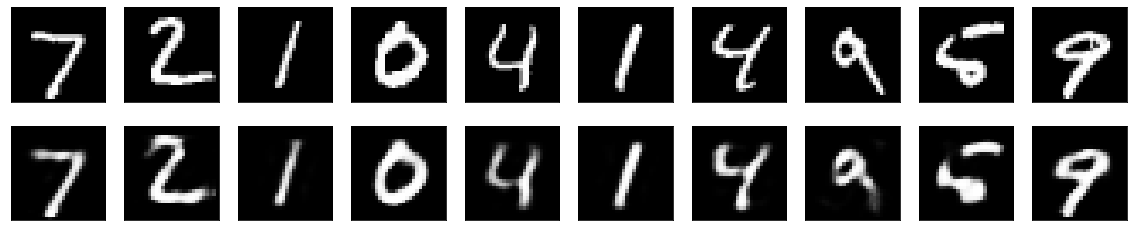

In [49]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Add sparsity to the simple autoencoder

In [57]:
input_layer = Input(shape=(784,))   # 28*28
encoded = layers.Dense(32, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# reconstruction model:
autoencoder = keras.Model(input_layer, decoded)

# encoder model:
encoder = keras.Model(input_layer, encoded)

# decoder model:
encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]  # last layer of autoencoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [58]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
24/24 [==============================] - 1s 25ms/step - loss: 0.6016 - val_loss: 0.4204
Epoch 2/30
24/24 [==============================] - 1s 22ms/step - loss: 0.3373 - val_loss: 0.2954
Epoch 3/30
24/24 [==============================] - 1s 22ms/step - loss: 0.2863 - val_loss: 0.2749
Epoch 4/30
24/24 [==============================] - 1s 22ms/step - loss: 0.2667 - val_loss: 0.2549
Epoch 5/30
24/24 [==============================] - 1s 26ms/step - loss: 0.2471 - val_loss: 0.2362
Epoch 6/30
24/24 [==============================] - 1s 24ms/step - loss: 0.2303 - val_loss: 0.2214
Epoch 7/30
24/24 [==============================] - 1s 22ms/step - loss: 0.2173 - val_loss: 0.2101
Epoch 8/30
24/24 [==============================] - 1s 22ms/step - loss: 0.2072 - val_loss: 0.2012
Epoch 9/30
24/24 [==============================] - 0s 20ms/step - loss: 0.1993 - val_loss: 0.1942
Epoch 10/30
24/24 [==============================] - 1s 22ms/step - loss: 0.1928 - val_loss: 0.1884
Epoch 11/

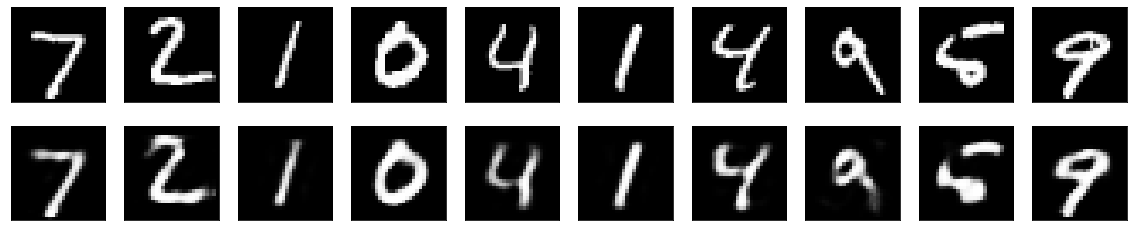

In [59]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Adding layers to autoencoder

In [66]:
input_layer = Input(shape=(784,))   # 28*28
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# reconstruction model:
autoencoder = keras.Model(input_layer, decoded)

# encoder model:
encoder = keras.Model(input_layer, encoded)

# decoder model:
encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-3]  # decoder layers of autoencoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [67]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
24/24 [==============================] - 1s 36ms/step - loss: 0.4991 - val_loss: 0.2915
Epoch 2/30
24/24 [==============================] - 1s 33ms/step - loss: 0.2770 - val_loss: 0.2615
Epoch 3/30
24/24 [==============================] - 1s 34ms/step - loss: 0.2517 - val_loss: 0.2376
Epoch 4/30
24/24 [==============================] - 1s 33ms/step - loss: 0.2270 - val_loss: 0.2129
Epoch 5/30
24/24 [==============================] - 1s 33ms/step - loss: 0.2045 - val_loss: 0.1937
Epoch 6/30
24/24 [==============================] - 1s 33ms/step - loss: 0.1883 - val_loss: 0.1798
Epoch 7/30
24/24 [==============================] - 1s 33ms/step - loss: 0.1763 - val_loss: 0.1699
Epoch 8/30
24/24 [==============================] - 1s 34ms/step - loss: 0.1675 - val_loss: 0.1621
Epoch 9/30
24/24 [==============================] - 1s 35ms/step - loss: 0.1606 - val_loss: 0.1563
Epoch 10/30
24/24 [==============================] - 1s 36ms/step - loss: 0.1554 - val_loss: 0.1513
Epoch 11/

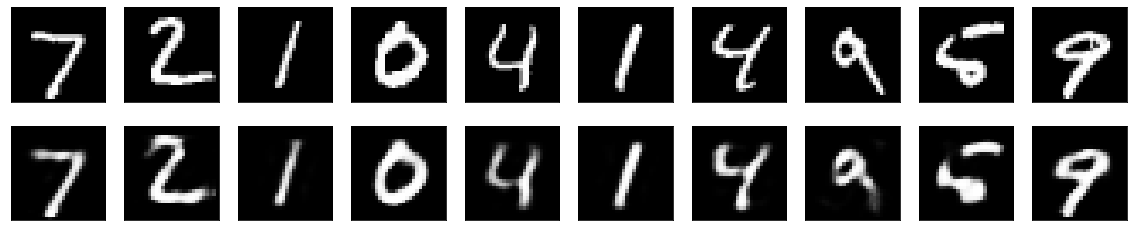

In [68]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Let's try a model with larger layers

This architecture came from here: https://www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases

In [ ]:
## input layer
input_layer = Input(shape=(784,))   # 28*28

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(x_train, x_train, epochs=30, batch_size=2048, validation_data=(x_validation, x_validation), callbacks=[early_stopping])

In [ ]:
predictions = model.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Hmmmm, what's going on? A more complicated model doesn't seem to be doing as well as a very simple autoencoder

## Let's try adding convolution

In [70]:
# shape back into image matrices
x_train = x_train.reshape(-1, 28, 28, 1)
x_validation = x_validation.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [73]:
input_layer = Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [74]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation, x_validation))

Epoch 1/30
24/24 [==============================] - 16s 662ms/step - loss: 0.5790 - val_loss: 0.4825
Epoch 2/30
24/24 [==============================] - 16s 677ms/step - loss: 0.4390 - val_loss: 0.3847
Epoch 3/30
24/24 [==============================] - 17s 703ms/step - loss: 0.3223 - val_loss: 0.2708
Epoch 4/30
24/24 [==============================] - 16s 684ms/step - loss: 0.2499 - val_loss: 0.2360
Epoch 5/30
24/24 [==============================] - 17s 708ms/step - loss: 0.2273 - val_loss: 0.2206
Epoch 6/30
24/24 [==============================] - 17s 707ms/step - loss: 0.2144 - val_loss: 0.2080
Epoch 7/30
24/24 [==============================] - 19s 811ms/step - loss: 0.2013 - val_loss: 0.1952
Epoch 8/30
24/24 [==============================] - 25s 1s/step - loss: 0.1907 - val_loss: 0.1861
Epoch 9/30
24/24 [==============================] - 22s 913ms/step - loss: 0.1817 - val_loss: 0.1768
Epoch 10/30
24/24 [==============================] - 20s 834ms/step - loss: 0.1729 - val_loss:

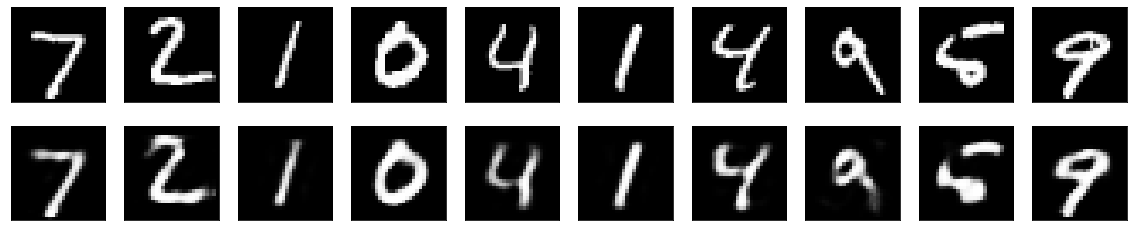

In [75]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## How to use tensorboard

In [89]:
from tensorflow.keras.callbacks import TensorBoard

tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = "/tmp/autoencoder",
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation, x_validation),
                callbacks = [tboard_callback])

#[TensorBoard(log_dir='/tmp/autoencoder', histogram_freq=0, write_graph=True)]

Epoch 1/30
24/24 [==============================] - 28s 1s/step - loss: 0.0794 - val_loss: 0.0776
Epoch 2/30
24/24 [==============================] - 28s 1s/step - loss: 0.0769 - val_loss: 0.0764
Epoch 3/30
24/24 [==============================] - 29s 1s/step - loss: 0.0759 - val_loss: 0.0757
Epoch 4/30
24/24 [==============================] - 29s 1s/step - loss: 0.0753 - val_loss: 0.0752
Epoch 5/30
24/24 [==============================] - 28s 1s/step - loss: 0.0749 - val_loss: 0.0747
Epoch 6/30
24/24 [==============================] - 28s 1s/step - loss: 0.0745 - val_loss: 0.0743
Epoch 7/30
24/24 [==============================] - 28s 1s/step - loss: 0.0741 - val_loss: 0.0740
Epoch 8/30
24/24 [==============================] - 28s 1s/step - loss: 0.0738 - val_loss: 0.0737
Epoch 9/30
24/24 [==============================] - 28s 1s/step - loss: 0.0736 - val_loss: 0.0734
Epoch 10/30
24/24 [==============================] - 28s 1s/step - loss: 0.0732 - val_loss: 0.0732
Epoch 11/30
24/24 [

In [90]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard
%tensorboard --logdir=/tmp/autoencoder

# can also run this in the terminal window:
# tensorboard --logdir=/tmp/autoencoder
# and go to http://localhost:6006/#scalars&run=train

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Image denoising with autoencoders

In [79]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_validation_noisy = x_validation + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_validation.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_validation_noisy = np.clip(x_validation_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

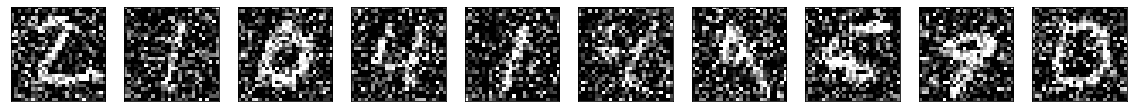

In [80]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
input_layer = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

NameError: name 'keras' is not defined

In [83]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation_noisy, x_validation))

Epoch 1/30
24/24 [==============================] - 28s 1s/step - loss: 0.1365 - val_loss: 0.1315
Epoch 2/30
24/24 [==============================] - 29s 1s/step - loss: 0.1306 - val_loss: 0.1268
Epoch 3/30
24/24 [==============================] - 38s 2s/step - loss: 0.1265 - val_loss: 0.1233
Epoch 4/30
24/24 [==============================] - 36s 2s/step - loss: 0.1234 - val_loss: 0.1207
Epoch 5/30
24/24 [==============================] - 33s 1s/step - loss: 0.1210 - val_loss: 0.1187
Epoch 6/30
24/24 [==============================] - 36s 2s/step - loss: 0.1192 - val_loss: 0.1169
Epoch 7/30
24/24 [==============================] - 35s 1s/step - loss: 0.1177 - val_loss: 0.1156
Epoch 8/30
24/24 [==============================] - 34s 1s/step - loss: 0.1164 - val_loss: 0.1145
Epoch 9/30
24/24 [==============================] - 34s 1s/step - loss: 0.1155 - val_loss: 0.1136
Epoch 10/30
24/24 [==============================] - 33s 1s/step - loss: 0.1145 - val_loss: 0.1127
Epoch 11/30
24/24 [

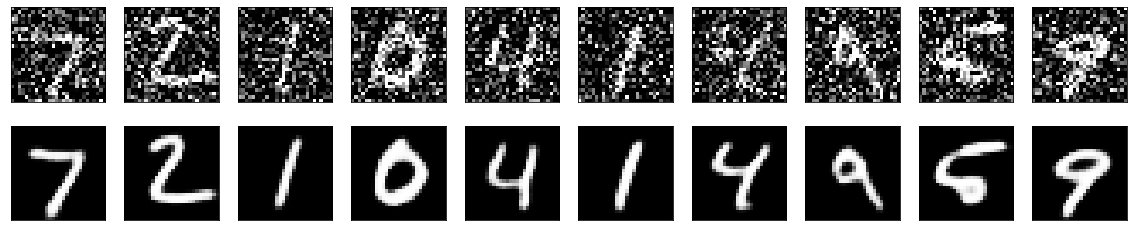

In [86]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Variational autoencoder

In [101]:
x_train_vae = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_validation_vae = x_validation.reshape((len(x_validation), np.prod(x_validation.shape[1:])))
x_test_vae = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [95]:
input_layer = Input(shape=(784,))

h = layers.Dense(64, activation='relu')(input_layer)
z_mean = layers.Dense(2)(h)
z_log_sigma = layers.Dense(2)(h)

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], 2),
                              mean=0., stddev=0.1)
    return z_mean + backend.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [104]:
# encoder part
encoder = keras.Model(input_layer, [z_mean, z_log_sigma, z], name='encoder')

# decoder part
latent_inputs = keras.Input(shape=(2,), name='z_sampling')
x = layers.Dense(64, activation='relu')(latent_inputs)
outputs = layers.Dense(784, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# VAE model
outputs = decoder(encoder(input_layer)[2])
vae = keras.Model(input_layer, outputs, name='vae')

vae.compile(optimizer='adam', loss='binary_crossentropy')

In [105]:
vae.fit(x_train_vae, x_train_vae,
        epochs=30,
        batch_size=2048,
        validation_data=(x_validation_vae, x_validation_vae))

Epoch 1/30
24/24 [==============================] - 1s 41ms/step - loss: 0.5543 - val_loss: 0.3447
Epoch 2/30
24/24 [==============================] - 1s 29ms/step - loss: 0.3012 - val_loss: 0.2821
Epoch 3/30
24/24 [==============================] - 1s 30ms/step - loss: 0.2764 - val_loss: 0.2710
Epoch 4/30
24/24 [==============================] - 1s 30ms/step - loss: 0.2664 - val_loss: 0.2612
Epoch 5/30
24/24 [==============================] - 1s 27ms/step - loss: 0.2580 - val_loss: 0.2551
Epoch 6/30
24/24 [==============================] - 1s 28ms/step - loss: 0.2531 - val_loss: 0.2510
Epoch 7/30
24/24 [==============================] - 1s 29ms/step - loss: 0.2490 - val_loss: 0.2466
Epoch 8/30
24/24 [==============================] - 1s 30ms/step - loss: 0.2444 - val_loss: 0.2422
Epoch 9/30
24/24 [==============================] - 1s 30ms/step - loss: 0.2406 - val_loss: 0.2390
Epoch 10/30
24/24 [==============================] - 1s 30ms/step - loss: 0.2379 - val_loss: 0.2367
Epoch 11/

#### Let's see what our data looks like in the latent space

In [187]:
z_mean, _, _ = encoder.predict(x_test_vae)

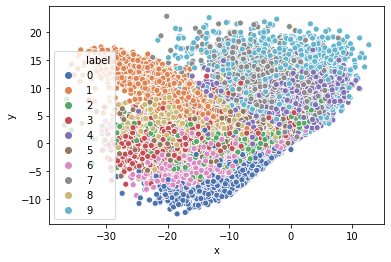

In [188]:
df = pd.DataFrame(list(zip(np.array(z_mean).transpose()[0], np.array(z_mean).transpose()[1], y_test)), 
                  columns =['x', 'y', 'label']) 

sns.scatterplot(data=df, x="x", y="y", hue="label",palette="deep",legend="full")

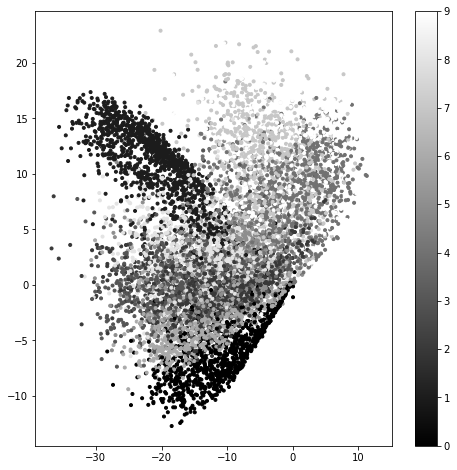

In [189]:
plt.figure(figsize=(8, 8))
plt.scatter(x=np.array(z_mean).transpose()[0], y=np.array(z_mean).transpose()[1], c=y_test, marker=".")
plt.colorbar()
plt.show()